# **Netflix Stock Price Prediction**

*  **Student 1: Lê Phước Nhân - 520H0559**
*  **Student 2: Nguyễn Thị Yến Nhi - 520H0396**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

**Read dataset from file**


In [2]:
filename = 'NFLX.csv'
df = pd.read_csv(filename)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**Preprocessing**

In [3]:
df.shape

(1009, 7)

**Checking missing data**

In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
cm = sns.light_palette("green", as_cmap=True)
df.describe().style.background_gradient(cmap=cm)

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7570685.034688
std,108.537532,109.262960,107.555867,108.289999,108.289999,5465535.225690
min,233.919998,250.649994,231.229996,233.880005,233.880005,1144000.000000
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4091900.000000
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5934500.000000
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9322400.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,58904300.000000


# **EDA**

# **Candlestick charts**

A candlestick chart gives a clear picture of the increase and decrease in stock prices, so let’s visualize a candlestick chart of the data before moving further

In [8]:
# Create candlestick chart
pio.templates.default = "plotly_dark"

fg = go.Figure(data=[go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"])])
fg.update_layout(title = "Netflix Stock Prices from 2018 to 2022", xaxis_rangeslider_visible=False)
fg.show()

**Setting Date to Index**

In [9]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


**Netflix Stock Plot for Overall Period**

Text(0.5, 1.0, 'Netflix Stock Plot for Overall Period')

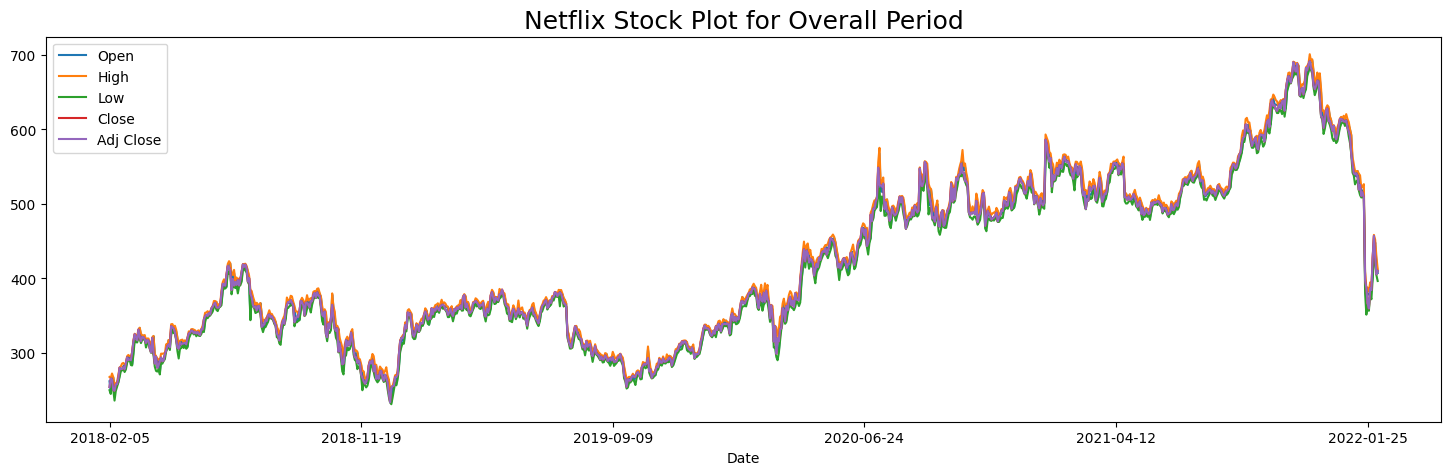

In [10]:
df[['Open','High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title("Netflix Stock Plot for Overall Period", fontsize=18)

**Visualization Values Stock per Period of Time**


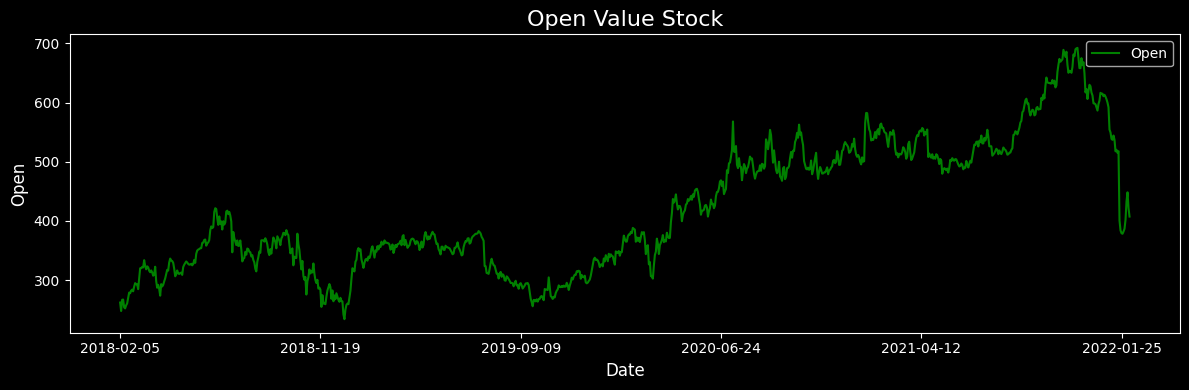

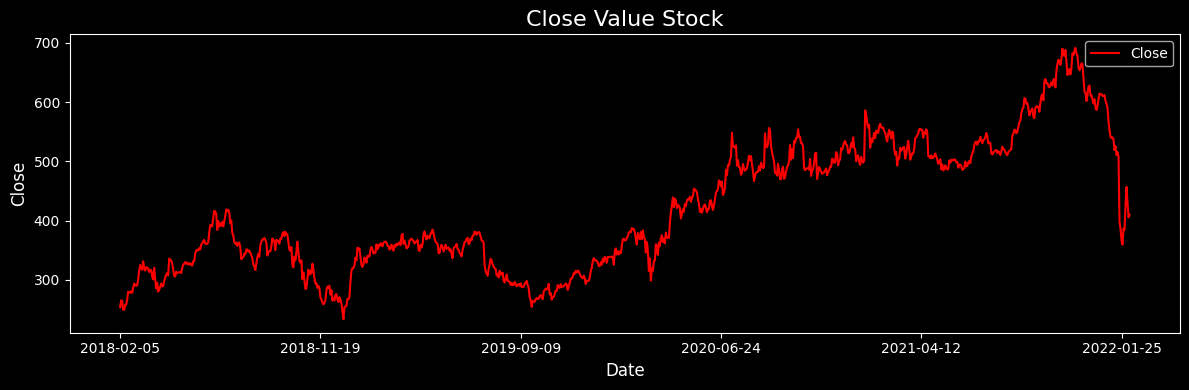

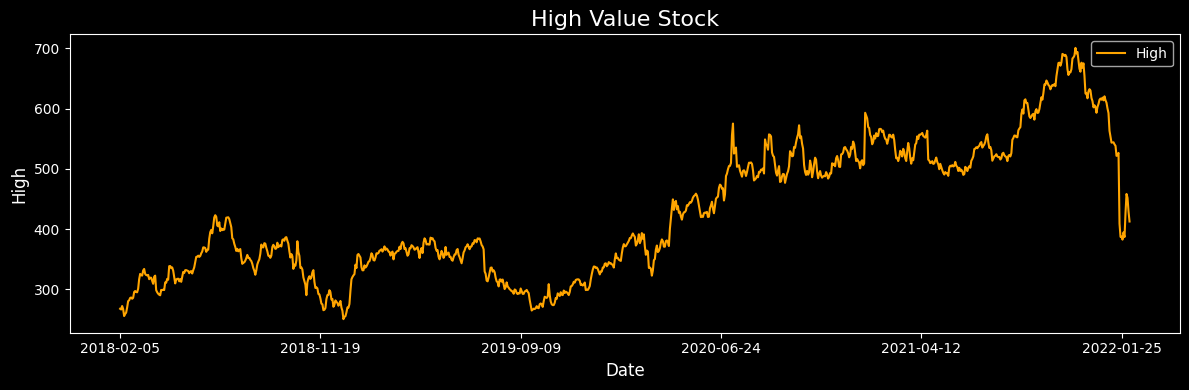

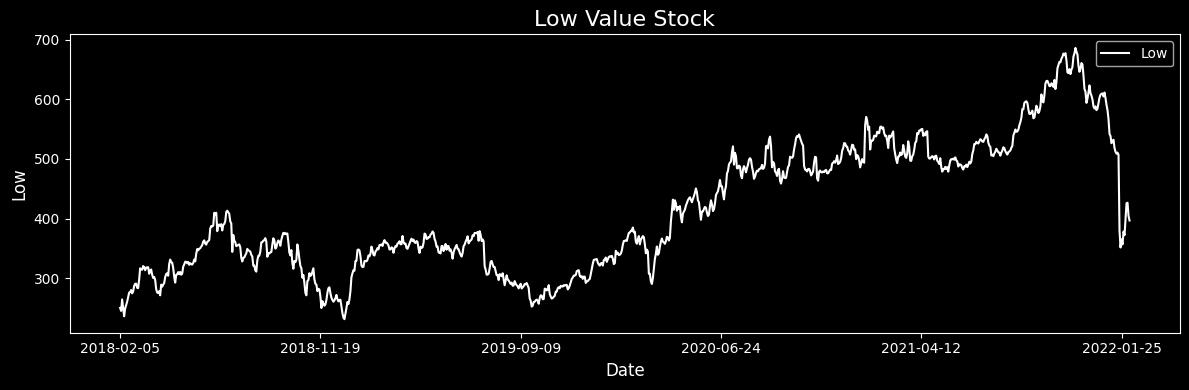

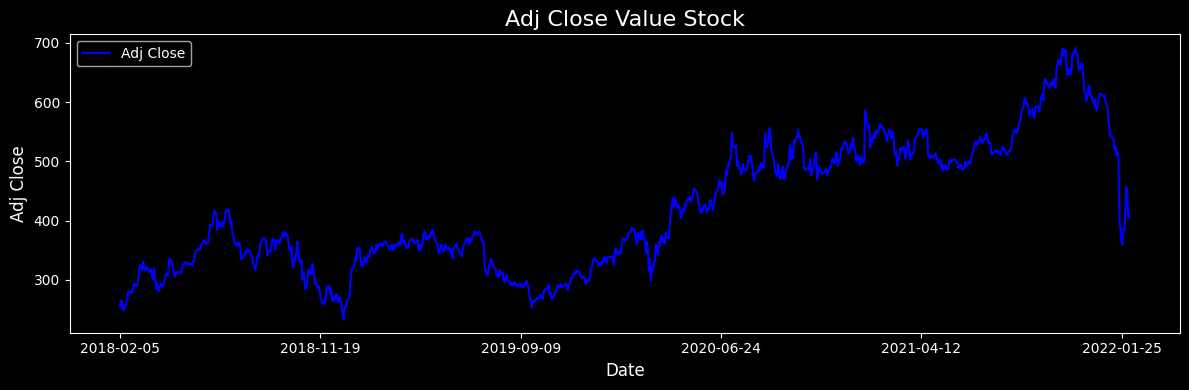

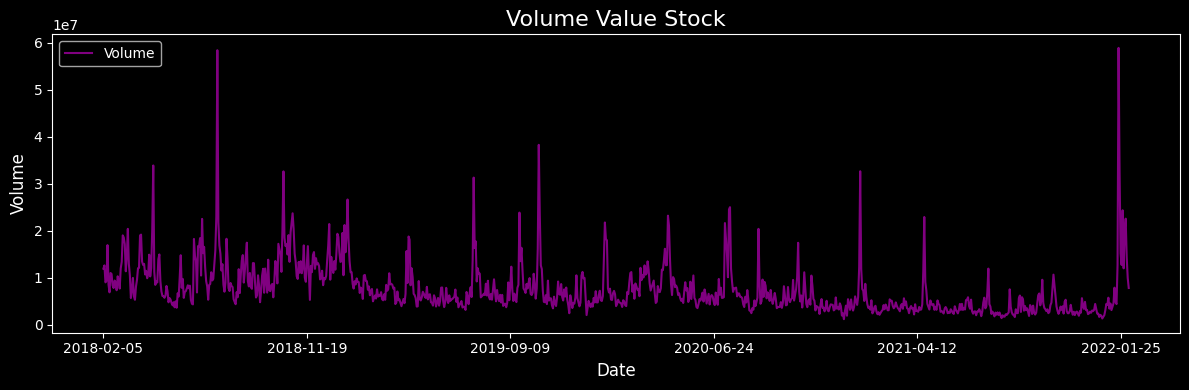

In [33]:
plt.figure(figsize=(12,4))
df['Open'].plot(color='green')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Open',fontsize= 12)
plt.title('Open Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(12,4))
df['Close'].plot(color='red')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Close',fontsize= 12)
plt.title('Close Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(12,4))
df['High'].plot(color='orange')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('High',fontsize= 12)
plt.title('High Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(12,4))
df['Low'].plot(color='white')
plt.xlabel('Date',fontsize= 12)
plt.ylabel('Low',fontsize= 12)
plt.title('Low Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(12,4))
df['Adj Close'].plot(color='blue')
plt.xlabel('Date', fontsize= 12)
plt.ylabel('Adj Close',fontsize= 12)
plt.title('Adj Close Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(12,4))
df['Volume'].plot(color='purple')
plt.xlabel('Date', fontsize= 12)
plt.ylabel('Volume',fontsize= 12)
plt.title('Volume Value Stock',fontsize= 16)
plt.legend()
plt.tight_layout()

#**Modelling (train & test data)**


# **Ensemble Learning (RandomForest)**

In [12]:
X_rf = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y_rf = df['Adj Close']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=0)

**Scale of data**

In [13]:
data_scale = StandardScaler()
X_train = data_scale.fit_transform(X_train_rf)
X_test = data_scale.transform(X_test_rf)

In [14]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train_rf, y_train_rf)
y_predict_rf = model.predict(X_test_rf)
print(y_predict_rf)
print(y_predict_rf.shape)

[553.97137601 379.24978571 361.31195786 282.40620018 261.1106334
 434.12840093 265.0824694  517.95360648 315.69806911 348.77217258
 520.26088534 321.34475264 489.8786001  298.20136405 510.71931092
 503.11331151 288.72631361 549.49048582 337.49758105 270.21613725
 338.57249553 294.20496034 462.41338583 369.04247224 290.21113387
 502.95015314 498.44456133 297.0068608  351.28284837 363.6167203
 280.9209422  542.83422599 316.88713674 540.81543363 303.79664093
 520.05826545 339.61662634 381.28551173 515.83044348 628.45031635
 482.24322233 297.94551988 305.69776403 264.88771103 515.96472066
 297.15404023 294.31643878 384.10761578 359.67359121 418.47030435
 365.85938115 608.07853329 480.62820511 512.64729849 364.59257334
 419.06538422 375.27641322 360.28349379 370.55831938 361.0713409
 294.90635352 493.30368374 491.94251831 405.99833518 325.16781697
 508.27718568 504.37618136 354.91632678 321.10632151 344.47837739
 656.26341881 351.3631924  263.21120194 267.71782703 427.07612088
 548.08470416

**Performance Evaluation**

In [15]:
errors = abs(y_predict_rf - y_test_rf)
mape = 100 * (errors / y_test_rf)
accuracy = 100 - np.mean(mape)

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test_rf, y_predict_rf), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test_rf, y_predict_rf), 4))
print("Mean Absolute Percentage Error",round(metrics.mean_absolute_percentage_error(y_test_rf,y_predict_rf), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test_rf, y_predict_rf)), 4))
print("R2 Score:", round(metrics.r2_score(y_test_rf, y_predict_rf), 4))
print(f'Train Score : {model.score(X_train_rf, y_train_rf) * 100:.2f}% and Test Score : {model.score(X_test_rf, y_test_rf) * 100:.2f}% using Random Tree Regressor.')
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.6652
Mean Squared Error: 2.2318
Mean Absolute Percentage Error 0.0015
Root Mean Squared Error: 1.4939
R2 Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using Random Tree Regressor.
Accuracy: 99.85 %.


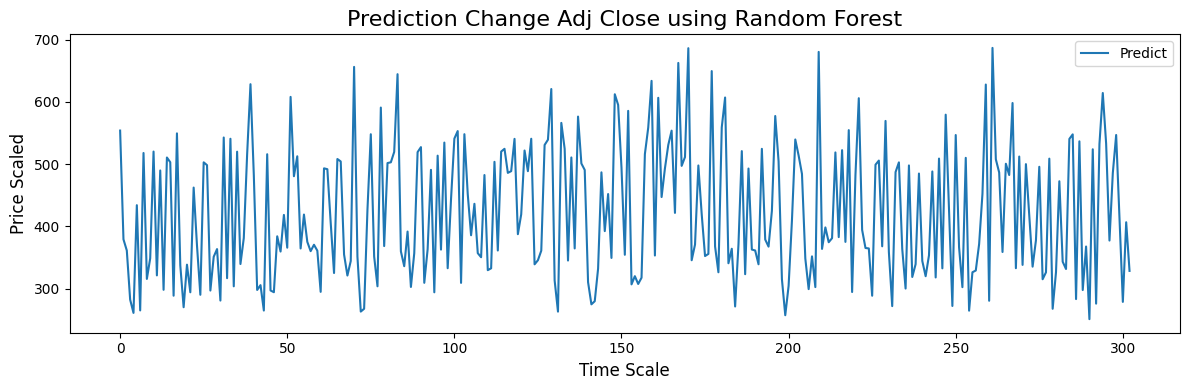

In [16]:
plt.figure(figsize=(12,4))
plt.plot(y_predict_rf, label='Predict')
plt.title('Prediction Change Adj Close using Random Forest',fontsize= 16)
plt.xlabel('Time Scale',fontsize= 12)
plt.ylabel('Price Scaled',fontsize= 12)
plt.legend()
plt.tight_layout()

# **Recccurent Neural Network (LSTM)**

In [17]:
# Create a new dataframe with only the Open column and convert it into a NumPy array
dataset = df['Open'].values

# Reshape the data
dataset = dataset.reshape(-1, 1)

# Split the data into training and testing sets
data_train = np.array(dataset[:int(dataset.shape[0]*0.8)])
data_test = np.array(dataset[int(dataset.shape[0]*0.8):])

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# We will create the helper function with 50 timesteps. In other words, for the features(x) we'll append the last 50 prices, and for the label(y) we'll append the next price.
# Create the function that will help us to create the datasets
def create_sequences(dataset):
    X = []
    y = []
    for i in range(50, len(dataset)):
        X.append(dataset[i-50:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [18]:
# Create the training and testing data by calling our function for each one
x_train, y_train = create_sequences(data_train)
x_test, y_test = create_sequences(data_test)

# Reshape the data to make it a 3D array in order to use it in LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

**Build LSTM Model**

*   We include 96 units in the LSTM layer to define the dimensionality of the output space.
*   The return_sequences parameter is configured as True to retrieve the last output in the output sequence.

*   The Dropout layers are set to drop 20% of the units.
*   Subsequently, we proceed to incorporate the Dense layer.

In [19]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [20]:
# Summary model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [21]:
# Reshape the feature for the LSTM layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # for expecting 3 dimentions, not 2
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

**Train Model**

In [23]:
# Save the model and start the training
model.fit(x_train, y_train, epochs=40, batch_size=64)
model.save('stock_prediction')

Epoch 1/40
12/12 [==============================] - 12s 291ms/step - loss: 0.0809
Epoch 2/40
12/12 [==============================] - 4s 345ms/step - loss: 0.0207
Epoch 3/40
12/12 [==============================] - 5s 362ms/step - loss: 0.0112
Epoch 4/40
12/12 [==============================] - 4s 295ms/step - loss: 0.0081
Epoch 5/40
12/12 [==============================] - 4s 291ms/step - loss: 0.0070
Epoch 6/40
12/12 [==============================] - 5s 440ms/step - loss: 0.0076
Epoch 7/40
12/12 [==============================] - 4s 299ms/step - loss: 0.0075
Epoch 8/40
12/12 [==============================] - 3s 291ms/step - loss: 0.0069
Epoch 9/40
12/12 [==============================] - 4s 376ms/step - loss: 0.0071
Epoch 10/40
12/12 [==============================] - 4s 342ms/step - loss: 0.0067
Epoch 11/40
12/12 [==============================] - 4s 298ms/step - loss: 0.0063
Epoch 12/40
12/12 [==============================] - 4s 297ms/step - loss: 0.0065
Epoch 13/40
12/12 [=====

In [24]:
# Load model
model = load_model('stock_prediction')

In [25]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
y_test_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 2s 49ms/step


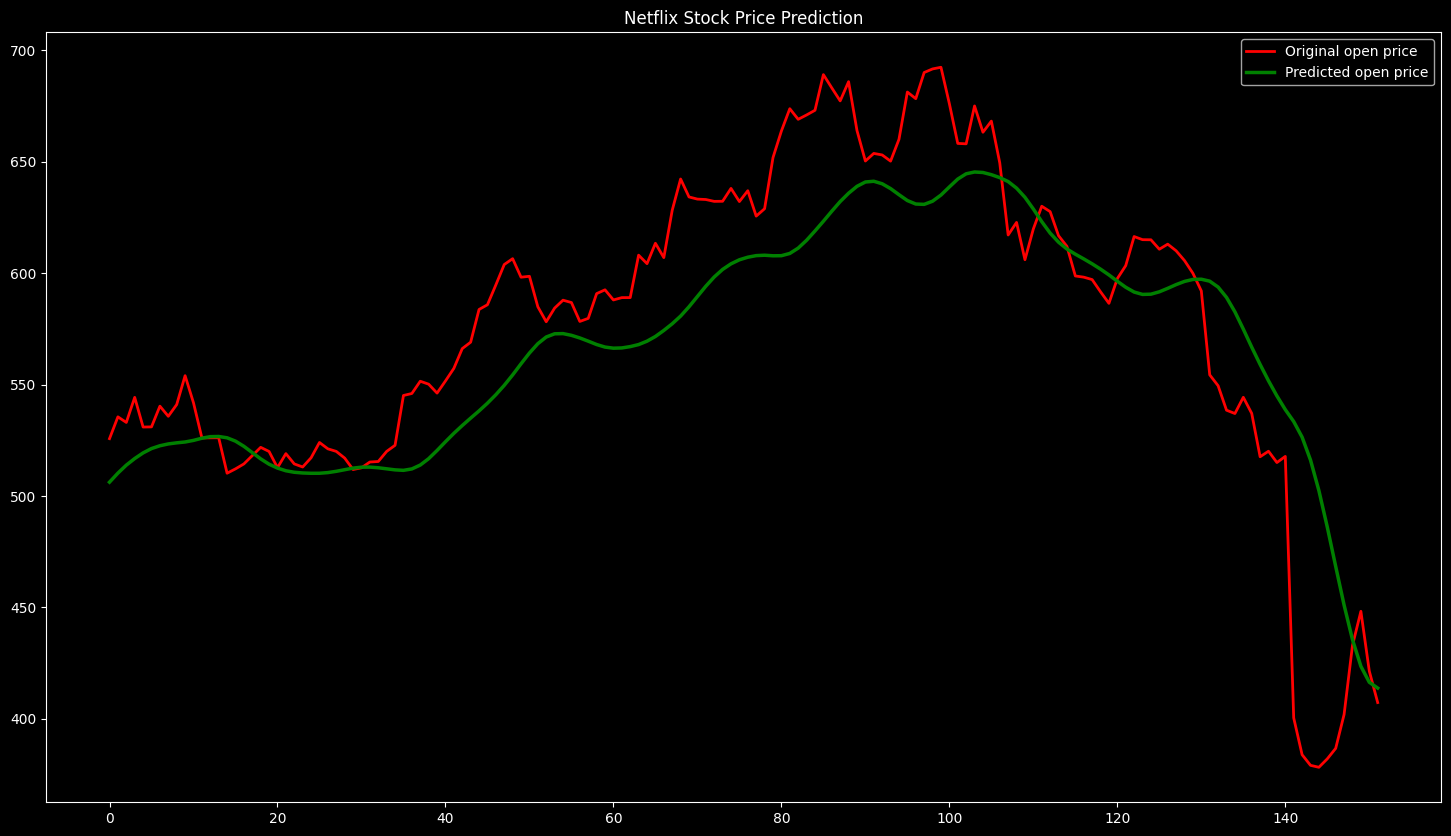

In [34]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(y_test_scale, color='r', linewidth=2, label='Original open price')
plt.plot(predict, color='g', linewidth=2.5, label='Predicted open price')
plt.title('Netflix Stock Price Prediction')
plt.legend();